In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [3]:
data_frame = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=1)
data_frame_1 = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=0)

In [4]:
turbidity_singapore = data_frame.loc[data_frame['Location']== 'Singapore'].loc[data_frame['Freshwater body type']=='Canal']['Turbdity_NTU'].dropna().value_counts()
phosphate_singapore = data_frame.loc[data_frame['Location']== 'Singapore']['Phosphate mg/L'].dropna().value_counts()

10.523809523809524


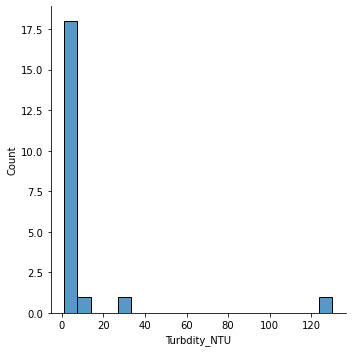

In [5]:
sns.displot(turbidity_singapore, bins=20)
print(turbidity_singapore.mean())

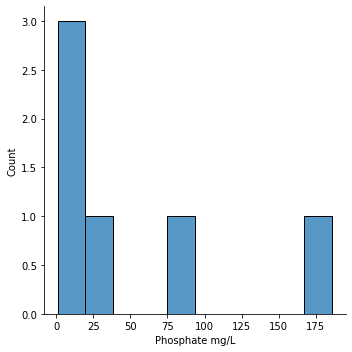

In [6]:
sns.displot(phosphate_singapore, bins=10)

In [7]:
nitrate = data_frame['Nitrate_mg/L']
Pop_density = data_frame['population density']

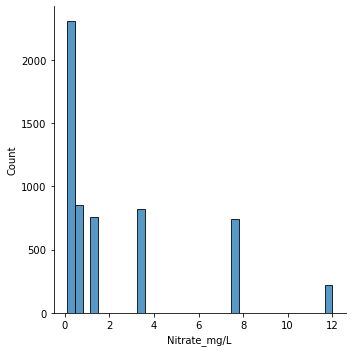

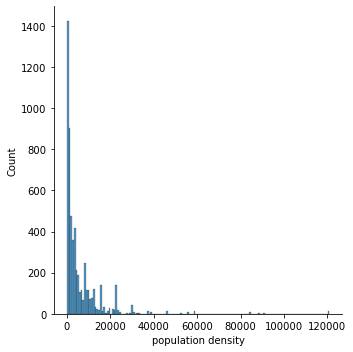

In [8]:
sns.displot(nitrate)
sns.displot(Pop_density)

<AxesSubplot:>

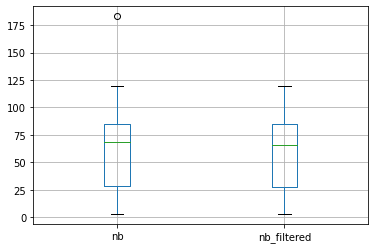

In [9]:
np.random.seed(33454)
df = (pd.DataFrame({'nb': np.random.randint(0, 100, 20)}).append(pd.DataFrame({'nb': np.random.randint(100, 200, 2)})).reset_index(drop=True))
Q1 = df['nb'].quantile(0.25)
Q3 = df['nb'].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')
df.join(filtered, rsuffix='_filtered').boxplot()


,Temperature,pdens,Chlaμgl,SPOMSPM
Skweness,0.465344,6.176548,1.571456,-0.375372
Kurtosis,0.138756,41.176563,1.799239,-0.853420


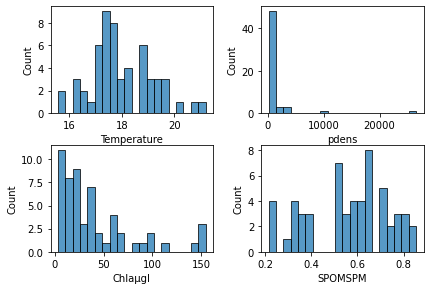

In [48]:
entries=['Temperature','pdens', 'Chlaμgl','SPOMSPM']
distribution_param = pd.DataFrame((data_frame_1[entries].skew(),data_frame_1[entries].kurtosis()), index=['Skweness','Kurtosis'])
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
j=0
for a in [0,1]:
    for b in [0,1]:
        sns.histplot(data=data_frame_1[entries[j]], bins=20, ax=axes[a,b])
        j+=1
distribution_param

,log(pdens),log(Chlaμgl)
Skweness,1.734305,-0.115639
Kurtosis,4.224470,-0.485844


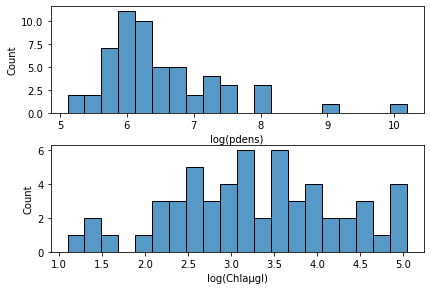

In [62]:
entries=['pdens', 'Chlaμgl']
new_entries = ['log(pdens)', 'log(Chlaμgl)']
transformed_data = pd.DataFrame((np.log(data_frame_1[entries])))
transformed_data.rename(columns={entries[0]: new_entries[0], entries[1]: new_entries[1]}, inplace=True)
distribution_param = pd.DataFrame((transformed_data.skew(), transformed_data.kurtosis()), index=['Skweness','Kurtosis'])
fig, axes = plt.subplots(2)
fig.tight_layout()
j=0
for a in [0,1]:
    sns.histplot(data=transformed_data[new_entries[j]], bins=20, ax=axes[a])
    j+=1
distribution_param

In [19]:
df = pd.DataFrame(data_frame_1[['Temperature', 'SPOMSPM',]])
df['Temp_zscore'] = (df.Temperature - df.Temperature.mean())/df.Temperature.std(ddof=1)
df['SPOMSPM_zscore'] = (df.SPOMSPM - df.SPOMSPM.mean())/df.SPOMSPM.std(ddof=1)
index=['Temperature','pdens', 'Chlaμgl','SPOMSPM']
df_statistic = pd.DataFrame(data_frame_1[index])

,Temperature,pdens,Chlaμgl,SPOMSPM
count,56.000000,56.000000,56.000000,56.000000
mean,17.975357,1404.896857,41.646468,0.562291
std,1.208393,3683.139984,40.345718,0.179242
min,15.570000,165.988000,2.994712,0.215097
25%,17.250000,373.480500,13.197570,0.376157
50%,17.690000,548.663000,25.812133,0.593558
75%,18.892500,942.966500,57.495688,0.706249
max,21.190000,26522.100000,154.754448,0.854772


In [182]:
entries=['Temperature', 'pdens', 'Chlaμgl', 'SPOMSPM']
new_entries=['Temperature', 'log(pdens)', 'log(Chlaμgl)', 'SPOMSPM']
data = {entries[0]:data_frame_1[entries[0]], new_entries[1]:np.log(data_frame_1[entries[1]]), new_entries[2]:np.log(data_frame_1[entries[2]]),entries[3]:data_frame_1[entries[3]]}
data_frame_for_outliers = pd.DataFrame(data)
data_frame_for_outliers.insert(1, 'Temperature_zscore', (data_frame_for_outliers.Temperature - data_frame_for_outliers.Temperature.mean())/data_frame_for_outliers.Temperature.std(ddof=1))
data_frame_for_outliers.insert(5, 'SPOMSPM_zscore', (data_frame_for_outliers.SPOMSPM - data_frame_for_outliers.SPOMSPM.mean())/data_frame_for_outliers.SPOMSPM.std(ddof=1))
FQR_dens = data_frame_for_outliers.describe()['log(pdens)']['25%']
IQR_pdens = data_frame_for_outliers.describe()['log(pdens)']['75%']-data_frame_for_outliers.describe()['log(pdens)']['25%']
FQR_chla = data_frame_for_outliers.describe()['log(Chlaμgl)']['25%']
IQR_chla = data_frame_for_outliers.describe()['log(Chlaμgl)']['75%']-data_frame_for_outliers.describe()['log(Chlaμgl)']['25%']
print(FQR_chla+1.5*IQR_chla)
data_frame_for_outliers

4.787642943201536


,Temperature,Temperature_zscore,log(pdens),log(Chlaμgl),SPOMSPM,SPOMSPM_zscore
0,20.86,2.387172,6.287018,2.754431,0.662094,0.556804
1,17.89,-0.070637,5.834457,2.814046,0.624648,0.347894
2,16.79,-0.980937,6.673294,3.562345,0.230513,-1.851004
3,18.21,0.194178,5.934331,2.531632,0.361576,-1.119800
4,17.58,-0.327176,5.698301,1.396641,0.325207,-1.322703
5,19.22,1.029998,6.414421,2.301892,0.376215,-1.038129
6,15.63,-1.940889,5.287605,1.300040,0.854772,1.631765
7,17.19,-0.649918,5.510829,3.632515,0.776129,1.193013
8,17.27,-0.583715,7.076384,1.096848,0.529597,-0.182403
9,17.80,-0.145116,5.111915,3.042515,0.280043,-1.574677


In [184]:
data_frame_for_outliers.style.applymap(lambda x: 'background-color : red' if abs(x)>3 else '', subset=['Temperature_zscore', 'SPOMSPM_zscore'])
data_frame_for_outliers.style.applymap(lambda x: 'background-color : yellow' if abs(x)>(FQR_dens)+1.5*IQR_pdens else '', subset=['log(pdens)'])
data_frame_for_outliers.style.applymap(lambda x: 'background-color : blue' if abs(x)>(FQR_chla)+1.5*IQR_chla else '', subset=['log(Chlaμgl)'])

,Temperature,Temperature_zscore,log(pdens),log(Chlaμgl),SPOMSPM,SPOMSPM_zscore
0,20.860000,2.387172,6.287018,2.754431,0.662094,0.556804
1,17.890000,-0.070637,5.834457,2.814046,0.624648,0.347894
2,16.790000,-0.980937,6.673294,3.562345,0.230513,-1.851004
3,18.210000,0.194178,5.934331,2.531632,0.361576,-1.119800
4,17.580000,-0.327176,5.698301,1.396641,0.325207,-1.322703
5,19.220000,1.029998,6.414421,2.301892,0.376215,-1.038129
6,15.630000,-1.940889,5.287605,1.300040,0.854772,1.631765
7,17.190000,-0.649918,5.510829,3.632515,0.776129,1.193013
8,17.270000,-0.583715,7.076384,1.096848,0.529597,-0.182403
9,17.800000,-0.145116,5.111915,3.042515,0.280043,-1.574677


In [185]:
data_frame_for_outliers = data_frame_for_outliers[abs(data_frame_for_outliers.Temperature_zscore) < 3]
data_frame_for_outliers = data_frame_for_outliers[abs(data_frame_for_outliers.SPOMSPM_zscore) < 3]
data_frame_for_outliers = data_frame_for_outliers[abs(data_frame_for_outliers['log(pdens)']) < (FQR_dens)+1.5*IQR_pdens]
data_frame_for_outliers = data_frame_for_outliers[abs(data_frame_for_outliers['log(Chlaμgl)']) < (FQR_chla)+1.5*IQR_chla]

data_frame_for_outliers

,Temperature,Temperature_zscore,log(pdens),log(Chlaμgl),SPOMSPM,SPOMSPM_zscore
0,20.86,2.387172,6.287018,2.754431,0.662094,0.556804
1,17.89,-0.070637,5.834457,2.814046,0.624648,0.347894
2,16.79,-0.980937,6.673294,3.562345,0.230513,-1.851004
3,18.21,0.194178,5.934331,2.531632,0.361576,-1.119800
4,17.58,-0.327176,5.698301,1.396641,0.325207,-1.322703
5,19.22,1.029998,6.414421,2.301892,0.376215,-1.038129
6,15.63,-1.940889,5.287605,1.300040,0.854772,1.631765
7,17.19,-0.649918,5.510829,3.632515,0.776129,1.193013
8,17.27,-0.583715,7.076384,1.096848,0.529597,-0.182403
9,17.80,-0.145116,5.111915,3.042515,0.280043,-1.574677
